In [2]:
%matplotlib widget
import ipywidgets as widgets
from IPython.display import display
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Respuesta transitoria y región de diseño
---

## Respuesta transitoria
Podemos generalizar los sistemas de segundo orden como:

$$
G(s) = \frac{\omega_n^2}{s^2+2\zeta\omega_n s+\omega_n^2}
$$

Podemos caracterizar la respuesta de sistemas de lazo cerrado utilizando la respuesta al escalón. Donde es posible identificar los siguientes parámetros:

* $y_{ee}$: **valor de estado estacionario**
* $t_{ee}$: **Tiempo de establecimiento**. Tiempo en el cual la respuesta al escalón se confina dentro de una banda de 1%, alrededor del valor final  
* $t_r$: **Tiempo de subida**. Tiemp en el cual la respuesta al escalón llega al 90% de su valor final , por primera vez.
* $M_p$: **Sobrepico**. Valor máximo la salida. Suele expresarse porcentualmente como:

De forma experimental, podemos estimar el sobrepico tomando el valor máximo de la medición y el valor esperado
$$
    M_p=\frac{y_{max}-y_{ee}}{y_{ee}} \times 100\%
$$


Una forma facil de estimar si la respuesta transitorio tendrá sobrepico, es analizando el valor de $\zeta$, 
* Si $0<\zeta<1$, el sistema es subamortiguado, por lo que tendra sobrepico. 
* Si $1\leq \zeta$, el sistema es amortiguado, por lo que no habrá sobrepico. 
* Si $\zeta \leq 0$, el sistema será inestable.



FloatSlider(value=0.5, continuous_update=False, description='zeta:', max=2.0, min=-2.0, step=1e-05)

FloatSlider(value=1.0, continuous_update=False, description='wn:', max=10.0, min=-2.0, step=1e-05)

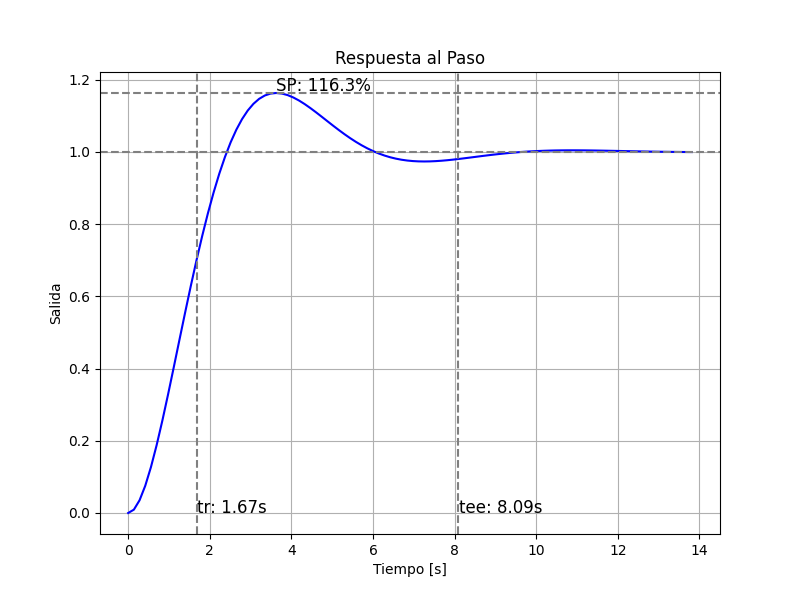

In [ ]:
# Ejecute esta celda para una visualización interactiva

zeta_slider = widgets.FloatSlider(
    value=0.5, min=-2, max=2, step=0.00001,
    description='zeta:', continuous_update=False, readout_format='.2f'
)

wn_slider = widgets.FloatSlider(
    value=1, min=-2, max=10.0, step=0.00001,
    description='wn:', continuous_update=False, readout_format='.2f'
)

fig = plt.figure(figsize=(8, 6))

def update(val=0):
    tf = ct.TransferFunction([wn_slider.value**2], [1, 2*zeta_slider.value*wn_slider.value, wn_slider.value**2])
    info = ct.step_info(tf)
    t, y = ct.step_response(tf)
    plt.clf()
    plt.plot(t, y, label='Respuesta al paso', color='blue')
    plt.axhline(1, color='gray', linestyle='--', label='Referencia')

    # Agregar información clave de la respuesta
    if zeta_slider.value < 1:
        plt.text(info['PeakTime'], info['Peak']+0.005, f"Mp: {info['Peak']*100:.1f}%", fontsize=12)
        plt.axhline(info['Peak'], color='gray', linestyle='--', label='Referencia')

    plt.text(info['SettlingTime']+0.005, 0, f"tee: {info['SettlingTime']:.2f}s", fontsize=12)
    plt.axvline(info['SettlingTime'], color='gray', linestyle='--', label='Referencia')

    plt.text(info['RiseTime']+0.005, 0, f"tr: {info['RiseTime']:.2f}s", fontsize=12)
    plt.axvline(info['RiseTime'], color='gray', linestyle='--', label='Referencia')


    plt.title('Respuesta al Paso')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Salida')
    plt.grid()
    fig.canvas.draw_idle()


display(zeta_slider, wn_slider)

zeta_slider.observe(update, names='value')
wn_slider.observe(update, names='value')

update()

# Lugar de las raíces
---


Para estimar de forma analítica el valor del sobrepico podemos utilizar la siguiente ecuación:

$$
    M_p=e^{-(\pi \zeta)/\sqrt{1-\zeta^2}}
$$ 

Tomando los polos del sistema:

$$
    -\zeta \omega_n \pm \omega_n \sqrt{\zeta^2-1}
$$

Podemos encontrar una circunferencia donde se ubican los polos en el plano complejo, de forma que es posible 

$$
    
$$


Para el tiempo de acentamiento, podemos encontrar la región de la forma:

$$
    -a = -\frac{4.5}{t_s}
$$

El tiempo de elevación lo podemos asociar con $\omega_n$, de modo que, el alejamiento de forma radial respecto al origen, causará que el tiempo de elevación menor.

$$
 t_r \approx \frac{1.8}{\omega_n}
$$


FloatSlider(value=0.1, continuous_update=False, description='Mp:', max=1.0, step=0.01)

FloatSlider(value=1.0, continuous_update=False, description='tr:', max=10.0, min=0.01, step=0.01)

FloatSlider(value=1.0, continuous_update=False, description='ts:', max=10.0, min=0.01, step=0.01)

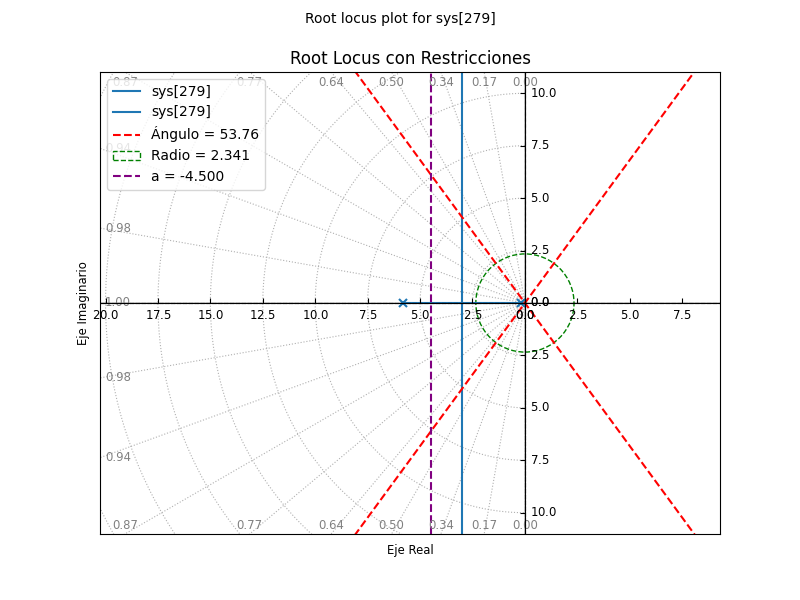

In [20]:

SP_max = 0.1
tr_max = 5
tee_max = 20

Mp_slider = widgets.FloatSlider(
    value=0.1, min=0, max=1, step=0.01,
    description='Mp:', continuous_update=False, readout_format='.2f'
)

tr_slider = widgets.FloatSlider(
    value=1, min=0.01, max=10.0, step=0.01,
    description='tr:', continuous_update=False, readout_format='.2f'
)

ts_slider = widgets.FloatSlider(
    value=1, min=0.01, max=10.0, step=0.01,
    description='ts:', continuous_update=False, readout_format='.2f'
)


fig = plt.figure(figsize=(8, 6))

def updateRL(val=0):
    zeta = 3
    wn = 1
    tf = ct.TransferFunction([wn**2], [1, 2*zeta*wn, wn**2])

    zeta_min = np.abs(np.log(Mp_slider.value))/np.sqrt(np.pi**2 + np.log(Mp_slider.value)**2)
    teta_max = np.acos(zeta_min)
    wn_min =  (2.23*zeta_min**2 + 0.036*zeta_min + 1.54)/tr_slider.value
    a = 4.5/ts_slider.value

    plt.clf()

    ct.root_locus(tf, grid=True)

    # Restricciones
    line_x = np.linspace(-10, 10, 500)
    line_y = np.tan(teta_max) * line_x
    plt.plot(line_x, line_y, 'r--', label=f'Ángulo = {np.rad2deg(teta_max):.2f}')
    plt.plot(line_x, -line_y, 'r--')

    # Círculo de frecuencia natural
    circle = plt.Circle((0, 0), wn_min, color='g', fill=False, linestyle='--', label=f'Radio = {wn_min:.3f}')
    plt.gca().add_artist(circle)

    plt.axvline(-a, color='purple', linewidth=1.5, linestyle='--', label=f'a = {-a:.3f}')  # Eje y

    # Configuración de la gráfica
    plt.title('Root Locus con Restricciones')
    plt.xlabel('Eje Real')
    plt.ylabel('Eje Imaginario')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Eje x
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Eje y
    plt.legend()

    fig.canvas.draw_idle()


display(Mp_slider, tr_slider, ts_slider)

Mp_slider.observe(updateRL, names='value')
tr_slider.observe(updateRL, names='value')
ts_slider.observe(updateRL, names='value')

updateRL()